In [137]:
# Import libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
# load the 2017-2018 school year file "MERGED2017_18_PP.csv" 
# Don't include all columns - too many and take up computer resources (computeing power and memory)
# Only load the following 10 columns should be loaded:
# UNITID: 
# OPEID:              
# OPEID6:            
# INSTNM:          
# CITY:                      
# ZIP:               
# ADM_RATE:           
# UGDS:              
# TUITIONFEE_IN:
df = pd.read_csv("MERGED2017_18_PP.csv", skipinitialspace = True, usecols = ['UNITID','INSTNM','CITY','STABBR','ZIP','ADM_RATE','UGDS','TUITIONFEE_IN'])

In [139]:
# <3>
# Load the scorecard file Most-Recent-Cohorts-Scorecard-Elements.csv from the link:
# https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv
# This file has thre median earnings which is not present in the previous file
# Only load the two columns:
# UNITID - This column is the unique identity for each college and will be used to join with the previous file
# MD_EARN_WNE_P10  - This column has the median earnings
df2 = pd.read_csv("https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv", skipinitialspace = True, usecols = ['UNITID','MD_EARN_WNE_P10'])

In [140]:
# <5>
#Join the two files together to produce a third file which contain all the columns and all colleges that are common to both files
df3 = pd.merge(df,df2, on=['UNITID'])
df3 = df3.dropna()
df3 = df3.reset_index(drop=True)
df3 = df3[df3.MD_EARN_WNE_P10 != 'PrivacySuppressed']

In [141]:
# <6>
# Explore the new file - number of colleges, head/tail/sample etc.
df3.head(11)

,UNITID,INSTNM,CITY,STABBR,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,0.9027,4824.0,9857.0,31000
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.9181,12866.0,8328.0,41200
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,0.8123,6917.0,10280.0,46700
3,100724,Alabama State University,Montgomery,AL,36104-0271,0.9787,4189.0,11068.0,27700
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0166,0.5330,32387.0,10780.0,44500
5,100830,Auburn University at Montgomery,Montgomery,AL,36117-3596,0.8254,4211.0,8020.0,33300
6,100858,Auburn University,Auburn,AL,36849,0.8393,23391.0,10968.0,48800
7,100937,Birmingham Southern College,Birmingham,AL,35254,0.6186,1283.0,35804.0,46700
8,101189,Faulkner University,Montgomery,AL,36109-3390,0.5101,2272.0,20970.0,35400
9,101365,Herzing University-Birmingham,Birmingham,AL,35209,0.7570,537.0,13850.0,37800


In [142]:
df3.tail(11)

,UNITID,INSTNM,CITY,STABBR,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
1775,482574,DeVry University-Ohio,Columbus,OH,43209,0.9583,870.0,17476.0,44100
1776,482583,DeVry University-Oklahoma,Oklahoma City,OK,73116,1.0000,4.0,17732.0,44100
1777,482608,DeVry University-Pennsylvania,Ft. Washington,PA,19034,1.0000,338.0,17572.0,44100
1778,482617,DeVry University-Tennessee,Nashville,TN,37211,1.0000,67.0,17828.0,44100
1779,482635,DeVry University-Texas,Irving,TX,75063,0.9333,564.0,17540.0,44100
1780,482653,DeVry University-Virginia,Arlington,VA,22202,0.7000,227.0,17572.0,44100
1781,482680,University of North Georgia,Dahlonega,GA,30597,0.7807,17067.0,4421.0,41900
1782,483124,Arizona State University-Skysong,Scottsdale,AZ,85257,0.6342,24244.0,9222.0,47700
1783,484473,University of Florida-Online,Gainesville,FL,32611,0.6802,2735.0,3876.0,56000
1784,484905,University of North Texas at Dallas,Dallas,TX,75241,0.7397,2663.0,7848.0,45000


In [143]:
df3.sample(11)

,UNITID,INSTNM,CITY,STABBR,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
327,146825,MacMurray College,Jacksonville,IL,62650-2590,0.5971,521.0,26100.0,36200
1373,219949,Cumberland University,Lebanon,TN,37087,0.5408,1658.0,21810.0,38700
845,189097,Barnard College,New York,NY,10027-6598,0.1542,2540.0,52662.0,57900
225,136774,Ringling College of Art and Design,Sarasota,FL,34234-5895,0.6391,1454.0,44560.0,33200
1076,201821,The Christ College of Nursing and Health Sciences,Cincinnati,OH,45219-2989,0.5144,912.0,16477.0,56200
1473,230047,Brigham Young University-Hawaii,Laie,HI,96762-1294,0.3677,2855.0,5400.0,42200
1409,223472,Vet Tech Institute of Houston,Houston,TX,77027,0.5758,191.0,14640.0,30100
236,138293,Webber International University,Babson Park,FL,33827-0096,0.4923,625.0,25358.0,37200
505,160755,Tulane University of Louisiana,New Orleans,LA,70118-5698,0.2150,7871.0,52960.0,61700
1503,232043,Eastern Mennonite University,Harrisonburg,VA,22802-2462,0.5373,1089.0,35800.0,40300


In [144]:
# <7>
# Find out the top 100 colleges that are hardest to get in (Top 100) from this new file
HardestSchool = df3.loc[df3['ADM_RATE']>0.0000].sort_values('ADM_RATE').head(100).reset_index(drop=True)
HardestSchool

,UNITID,INSTNM,CITY,STABBR,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
0,243744,Stanford University,Stanford,CA,94305,0.0473,7056.0,49617.0,94000
1,166027,Harvard University,Cambridge,MA,02138,0.0516,7532.0,48949.0,89700
2,192110,The Juilliard School,New York,NY,10023-6588,0.0592,486.0,43170.0,32800
3,186131,Princeton University,Princeton,NJ,08544-0070,0.0641,5246.0,47140.0,74700
4,190150,Columbia University in the City of New York,New York,NY,10027,0.0661,8170.0,57208.0,83300
...,...,...,...,...,...,...,...,...,...
95,213385,Lafayette College,Easton,PA,18042-1768,0.3081,2567.0,51600.0,68600
96,159382,Louisiana State University-Alexandria,Alexandria,LA,71302-9121,0.3107,2662.0,6668.0,33700
97,211291,Bucknell University,Lewisburg,PA,17837,0.3108,3588.0,53986.0,70800
98,221254,O'More College of Design,Franklin,TN,37064,0.3146,148.0,29880.0,31800


In [145]:
# <8>
# Display the summary statistics of the in-state tuitions of the top 100 colleges that are hardest to get in
HardestSchool.TUITIONFEE_IN.describe()

count      100.000000
mean     37579.700000
std      18368.610418
min       1020.000000
25%      16918.250000
50%      49640.500000
75%      52666.000000
max      57208.000000
Name: TUITIONFEE_IN, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

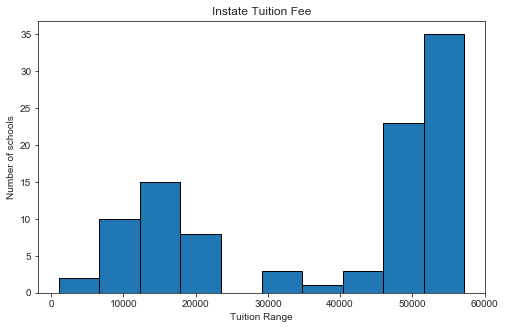

In [146]:
# <9>
# Display the histogram of the in-state tuitions of the top 100 colleges that are hardest to get in
TuitionFeeInstate = HardestSchool['TUITIONFEE_IN']
plt.figure(figsize=(8,5))
plt.hist([TuitionFeeInstate],edgecolor='black')
plt.xlabel("Tuition Range")
plt.ylabel("Number of schools")
plt.title("Instate Tuition Fee")
plt.show

In [147]:
# <10>
# Display the summary statistics of the earning potentials of the top 100 colleges that are hardest to get in
HardestSchool.MD_EARN_WNE_P10.describe()

count       100
unique       94
top       63800
freq          2
Name: MD_EARN_WNE_P10, dtype: object

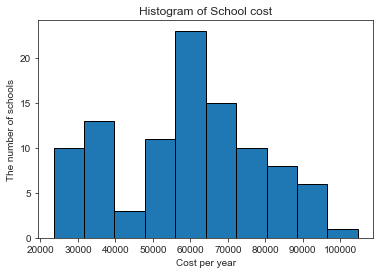

In [150]:
# <11>
# Display the histogram of the earning potentials of the top 100 colleges that are hardest to get in
plt.hist(HardestSchool.MD_EARN_WNE_P10,edgecolor='black')
plt.title("Histogram of School cost")
plt.xlabel("Cost per year")
plt.ylabel("The number of schools")
plt.show()

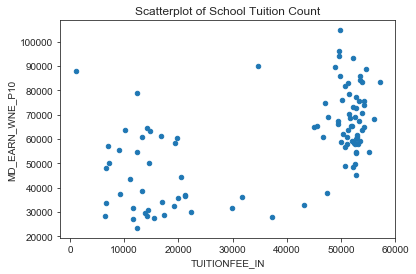

In [151]:
##### <12>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Pandas
HardestSchool.dtypes
HardestSchool['MD_EARN_WNE_P10'] = HardestSchool.MD_EARN_WNE_P10.astype('float64')
scatplot = HardestSchool.plot.scatter(x='TUITIONFEE_IN',y='MD_EARN_WNE_P10',title='Scatterplot of School Tuition Count')

Text(0, 0.5, 'Income')

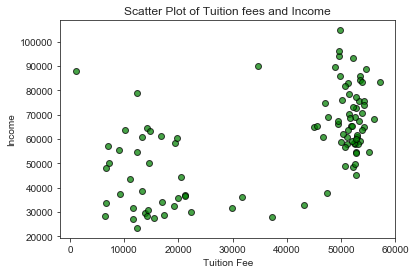

In [152]:
# <13>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Matplotlib
plt.title('Scatter Plot of Tuition fees and Income')
plt.scatter(x='TUITIONFEE_IN',y='MD_EARN_WNE_P10',data=HardestSchool,c='green',
            edgecolor='black',linewidth=1,alpha=0.72)
plt.xlabel("Tuition Fee")
plt.ylabel("Income")

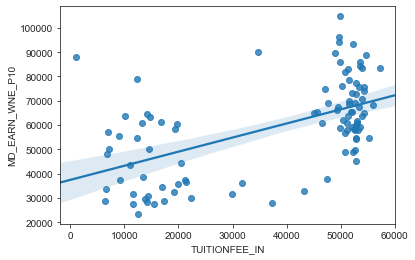

In [153]:
# <14>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Seaborn
import seaborn as sns

sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='TUITIONFEE_IN', y='MD_EARN_WNE_P10', data=HardestSchool)


# Your observation/conclusion of the scatter plot (use the following Markdown cell)

From doing this assignment and checking out the data from a plot stand point I see that there is a large enough gap or separation between the schools that are more expensive then others. From look at the data from a plot stand point I can tell a few things one being that the fewer the amount of school that is able to get into a college the more expensive that college is. I also see that with going to an expensive school you have the chance to make are large sum of money when leaving/graduating. 